## Importing Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

## Loading the Dataset

In [3]:
#Dataset is being loaded
spam_dataset = pd.read_csv("spambase.csv")

# Adding the names for the column
spam_dataset.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'target_value']

# For visibility purpose, first 5 rows are being displayed
spam_dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target_value
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
#Finding the shape of the dataset
spam_dataset.shape

(4600, 58)

## Data Cleaning

In [5]:
# Removing duplicate data rows from the dataset
spam_dataset = spam_dataset.drop_duplicates()
spam_dataset.shape

(4209, 58)

In [6]:
# Getting missing data values in the columns per column
missing_data_vals = spam_dataset.isnull().sum()
missing_data_vals

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

## Spam Dataset Visualization

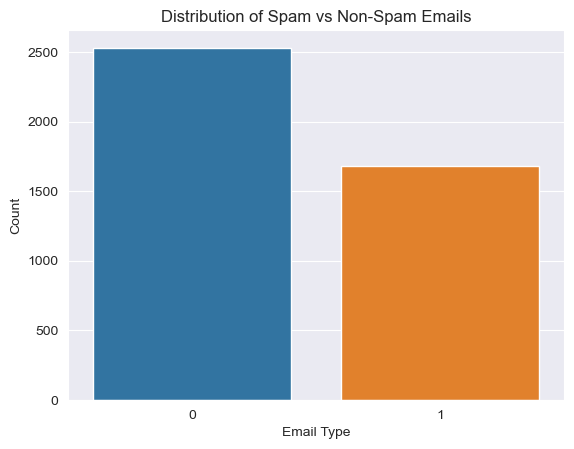

In [7]:
sns.countplot(x='target_value', data=spam_dataset)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

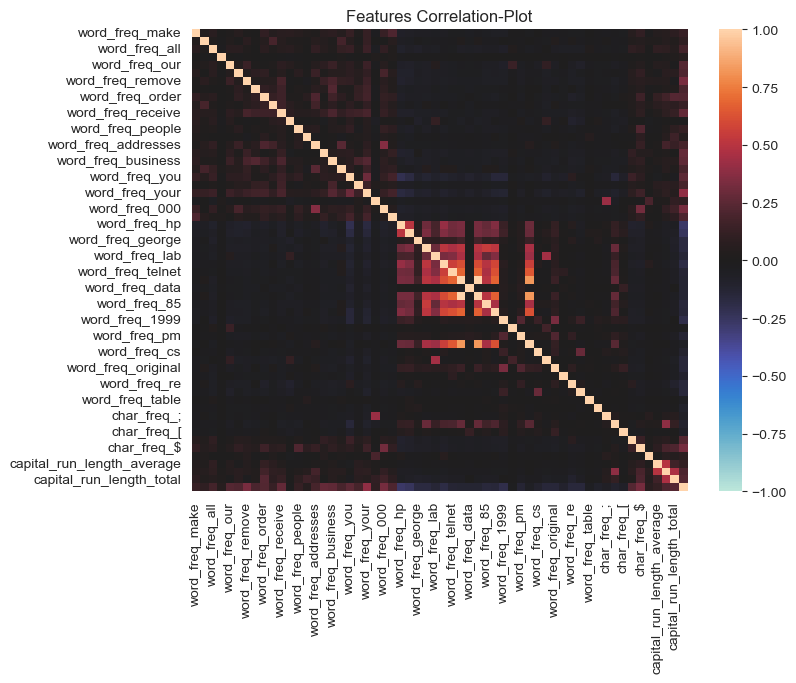

In [8]:
# Compute the correlation matrix
corr = spam_dataset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=[8,6])
plt.title('Features Correlation-Plot')
sns.heatmap(corr, vmin=-1, vmax=1, center=0)
plt.show()

In [9]:
# Creating a dataset with all the training data except the target value column
X = spam_dataset.drop(columns=['target_value'])
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [10]:
# Getting and separating the target values
Y = spam_dataset['target_value'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.35203068,  0.3687239 ,  0.40452578, ..., -0.00815397,
         0.24482253,  1.19099523],
       [-0.14796835, -0.24776187,  0.81174673, ...,  0.13384834,
         2.16884257,  3.18079631],
       [-0.34796797, -0.24776187, -0.56504793, ..., -0.05572942,
        -0.06081607, -0.16194019],
       ...,
       [ 0.6520301 , -0.24776187,  0.01669629, ..., -0.12007846,
        -0.23117201, -0.27993815],
       [ 2.85202586, -0.24776187, -0.56504793, ..., -0.12783172,
        -0.23618248, -0.34459456],
       [-0.34796797, -0.24776187,  0.69539789, ..., -0.12472438,
        -0.23618248, -0.40601815]])

## Scaled Dataset Splitting

In [12]:
# Split dataset into training (70%) and testing (30%) - using the scaled data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size = 0.7, random_state = 0)


## ## Applying PCA to the scaled dataset

In [13]:
pca = PCA(0.85)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(4209, 39)

In [14]:
pca.explained_variance_ratio_

array([0.10899513, 0.05583094, 0.0353128 , 0.02858045, 0.0271153 ,
       0.02575975, 0.02483614, 0.02398193, 0.02270325, 0.02183887,
       0.02167963, 0.02015995, 0.02006717, 0.01935537, 0.01924267,
       0.01866808, 0.01848522, 0.01796674, 0.0178274 , 0.01756145,
       0.01717349, 0.01698023, 0.01672036, 0.01657472, 0.01645046,
       0.01610422, 0.01585499, 0.01571016, 0.0153264 , 0.01517569,
       0.01456768, 0.01435856, 0.01421106, 0.01406908, 0.01383434,
       0.01333399, 0.01329598, 0.01301827, 0.01274202])

In [15]:
pca.explained_variance_ratio_.sum()

0.8514699010231024

In [16]:
pca.n_components_

39

In [17]:
# Split dataset into training (70%) and testing (30%) - using the PCA scaled data
X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, train_size = 0.7, random_state = 0)

## Decision Tree

In [18]:
#Create decision tree classification model
decision_t_classification = DecisionTreeClassifier(random_state=0,criterion='gini')

# Train the model using the training sets
decision_t_classification.fit(X_train,Y_train)

#Getting the training data accuracy score
print(decision_t_classification.score(X_train,Y_train))

#Getting the testing data accuracy score
print(decision_t_classification.score(X_test,Y_test))

1.0
0.8978622327790974


## Dataset Evaluation - Train Dataset

In [19]:
# Predict the response for train dataset
train_prediction = decision_t_classification.predict(X_train)

# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = train_prediction)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = train_prediction))

          Not-spam  Spam
Not-spam      1794     0
Spam             0  1152
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00      1152

    accuracy                           1.00      2946
   macro avg       1.00      1.00      1.00      2946
weighted avg       1.00      1.00      1.00      2946



## Dataset Validation - Test Dataset

In [20]:
# Predict the response for test dataset
test_prediction = decision_t_classification.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = test_prediction)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = test_prediction))

          Not-spam  Spam
Not-spam       677    60
Spam            69   457
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       737
           1       0.88      0.87      0.88       526

    accuracy                           0.90      1263
   macro avg       0.90      0.89      0.89      1263
weighted avg       0.90      0.90      0.90      1263



## After Applying PCA for the Decision Tree Model

In [21]:
# Train the model using the training sets
decision_t_classification.fit(X_train_pca,Y_train )

#Getting the training data accuracy score for the PCA implemented data
print(decision_t_classification.score(X_train_pca, Y_train))

#Getting the test data accuracy score for the PCA implemented data
print(decision_t_classification.score(X_test_pca, Y_test))

1.0
0.8519398258115598


## Dataset Evaluation - Train Data

In [22]:
# Predict the response for train dataset
train_prediction = decision_t_classification.predict(X_train_pca)

# Confusion matrix
confusion_m = confusion_matrix(y_true = Y_train, y_pred = train_prediction)

print(pd.DataFrame(confusion_m, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_train, y_pred = train_prediction))

          Not-spam  Spam
Not-spam      1794     0
Spam             0  1152
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1794
           1       1.00      1.00      1.00      1152

    accuracy                           1.00      2946
   macro avg       1.00      1.00      1.00      2946
weighted avg       1.00      1.00      1.00      2946



## Dataset Validation - Test Data

In [23]:
# Predict the response for test dataset
test_prediction = decision_t_classification.predict(X_test_pca)

# Confusion matrix
cm = confusion_matrix(y_true = Y_test, y_pred = test_prediction)

print(pd.DataFrame(cm, index = ['Not-spam', 'Spam'], columns = ['Not-spam', 'Spam']))
print('-----------------------------------------------------')
print(classification_report(y_true = Y_test, y_pred = test_prediction))

          Not-spam  Spam
Not-spam       643    94
Spam            93   433
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       737
           1       0.82      0.82      0.82       526

    accuracy                           0.85      1263
   macro avg       0.85      0.85      0.85      1263
weighted avg       0.85      0.85      0.85      1263



## Visualization of the Decision Tree

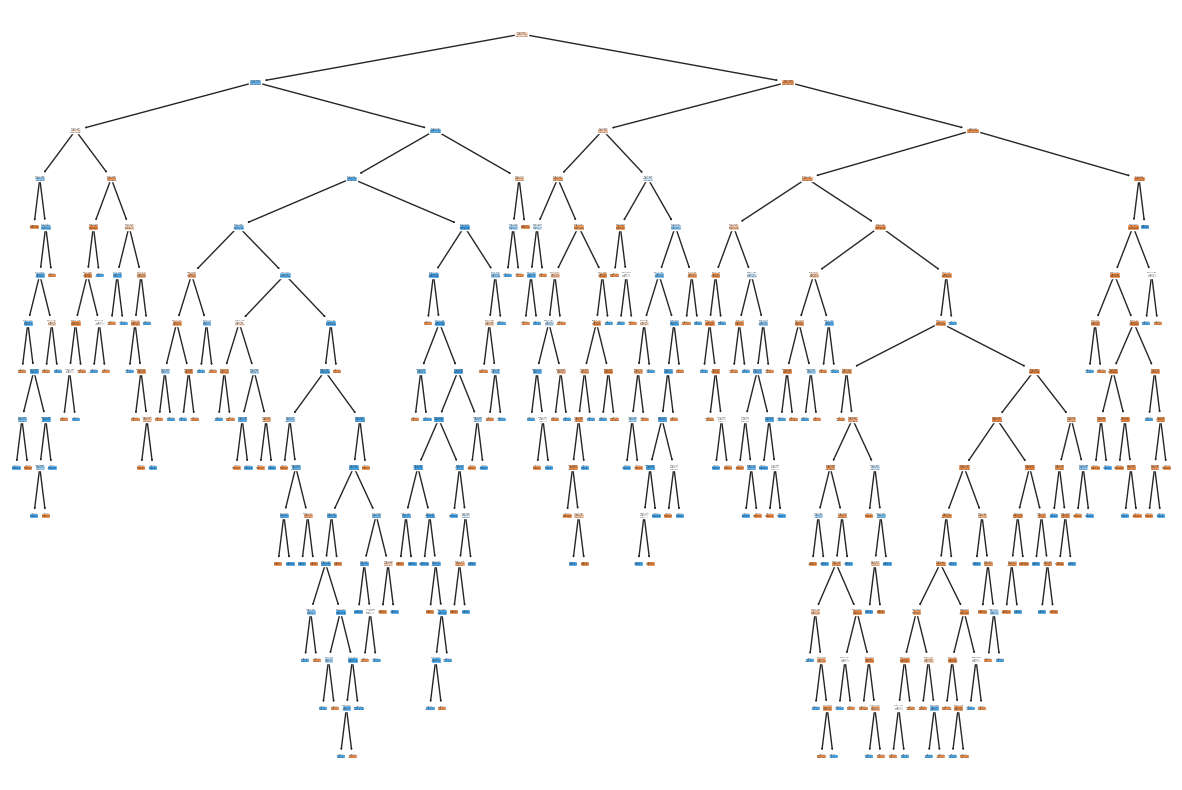

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_t_classification,filled=True)
plt.show()